In [97]:
# First I'll need to import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime 
import seaborn as sns
import calendar

In [98]:
# Get the data. 

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)
df

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_66906/1607199724.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [99]:
# Applying dropna() to remove possible NaN values, 

df = df.dropna()

In [100]:
# Getting the data related to the temperature and the date.

df[['date', 'temp']]

,date,temp
0,10-apr-1996 14:00,11.5
1,31-jul-1996 08:00,11.5
2,31-jul-1996 09:00,11.6
3,31-jul-1996 10:00,12.9
4,31-jul-1996 11:00,14.5
...,...,...
247669,31-oct-2024 20:00,10.1
247670,31-oct-2024 21:00,10.1
247671,31-oct-2024 22:00,10.0
247672,31-oct-2024 23:00,9.8


In [101]:
# create new columns for day, month and year, because the time is not needed in the date.

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [102]:
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,day,month,year
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,10,4,1996
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,31,7,1996
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,31,7,1996
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,31,7,1996
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,31,7,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,220,,,0.0,,0,8,31,10,2024
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,230,,,0.0,,0,8,31,10,2024
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,210,,,0.0,,0,8,31,10,2024
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,200,,,0.0,,0,8,31,10,2024


In [103]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])   # Convert the month number to month name

df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,day,month,year
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,10,Apr,1996
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,31,Jul,1996
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,31,Jul,1996
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,31,Jul,1996
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,31,Jul,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,220,,,0.0,,0,8,31,Oct,2024
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,230,,,0.0,,0,8,31,Oct,2024
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,210,,,0.0,,0,8,31,Oct,2024
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,200,,,0.0,,0,8,31,Oct,2024


<Axes: xlabel='date'>

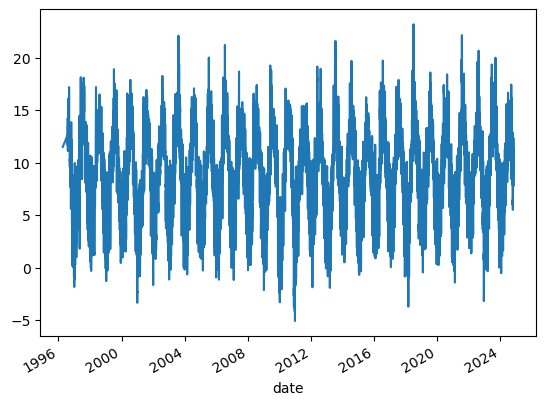

In [ ]:
df.groupby(df['date'].dt.floor('1D'))["temp"].mean().dropna().plot(kind="line")


In [ ]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0        1996-04-10
1        1996-07-31
2        1996-07-31
3        1996-07-31
4        1996-07-31
            ...    
247669   2024-10-31
247670   2024-10-31
247671   2024-10-31
247672   2024-10-31
247673   2024-11-01
Name: date, Length: 247674, dtype: datetime64[ns]

In [ ]:
df['daily'] = pd.to_datetime(df['date'], errors='coerce').dt.day
df['month'] = pd.to_datetime(df['date'], errors='coerce').dt.month    
df['yearly'] = pd.to_datetime(df['date'], errors='coerce').dt.year

df['daily_temp'] = df.groupby(['daily', 'monthly', 'yearly'])['temp'].transform('mean')
df['daily_temp']

0         11.500000
1         12.650000
2         12.650000
3         12.650000
4         12.650000
            ...    
247669    10.554167
247670    10.554167
247671    10.554167
247672    10.554167
247673     9.700000
Name: daily_temp, Length: 247674, dtype: float64

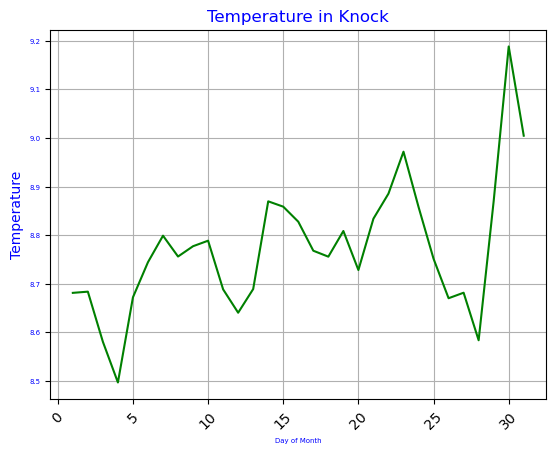

In [ ]:
mean_temp = df.groupby('daily')['daily_temp'].mean()

# Plotting the data
fig, ax = plt.subplots()
ax.plot(mean_temp.index, mean_temp, color='green')
ax.set(xlabel="Day of Month", ylabel="Temperature", title="Temperature in Knock")
ax.title.set_color('blue')
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.xlabel("Day of Month", fontsize=5, color='blue')
plt.xticks(rotation=45)
plt.yticks(fontsize=5, color='blue')
ax.grid()
plt.show()

In [107]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

median_temp = df['date'].map(lambda x: x.month)

temper = df.groupby(median_temp)['temp'].mean()

total = pd.DataFrame({'month': temper.index, 'Mean_Temperature': temper.values})

print(total)

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_66906/2103411416.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime


    month  Mean_Temperature
0       1          4.348502
1       2          4.686452
2       3          5.625178
3       4          7.519131
4       5         10.212284
5       6         12.366806
6       7         13.650432
7       8         13.561267
8       9         12.092390
9      10          9.328369
10     11          6.488433
11     12          4.760484


In [ ]:
median_temp = df['date'].map(lambda x: x.month)

temper = df.groupby(median_temp)['temp'].mean()

total = pd.DataFrame({'Total': [median_temp.size]})

print(total)